# Feature Selection

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv("F:\Omar 3amora\Heart_Disease_Project\Data\heart_disease_cleaned.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   thalch                    920 non-null    float64
 5   oldpeak                   920 non-null    float64
 6   ca                        920 non-null    float64
 7   num                       920 non-null    int64  
 8   sex_Male                  920 non-null    bool   
 9   dataset_Hungary           920 non-null    bool   
 10  dataset_Switzerland       920 non-null    bool   
 11  dataset_VA Long Beach     920 non-null    bool   
 12  cp_atypical angina        920 non-null    bool   
 13  cp_non-anginal            920 non-null    bool   
 14  cp_typical

In [11]:
df = df.drop('id', axis=1)

X = df.drop('num', axis=1)  # All columns except the target
y = df['num']               # Target column

Random Forest Ranking

                     Feature  Importance
3                     thalch    0.124715
2                       chol    0.121821
0                        age    0.121618
4                    oldpeak    0.111147
1                   trestbps    0.094014
16                exang_True    0.051767
5                         ca    0.048196
10        cp_atypical angina    0.038886
7            dataset_Hungary    0.034724
11            cp_non-anginal    0.028883
6                   sex_Male    0.026639
19               thal_normal    0.025893
14            restecg_normal    0.024483
13                  fbs_True    0.021996
8        dataset_Switzerland    0.020639
9      dataset_VA Long Beach    0.020226
17                slope_flat    0.019445
20    thal_reversable defect    0.019331
15  restecg_st-t abnormality    0.018493
18           slope_upsloping    0.015707
12         cp_typical angina    0.011377


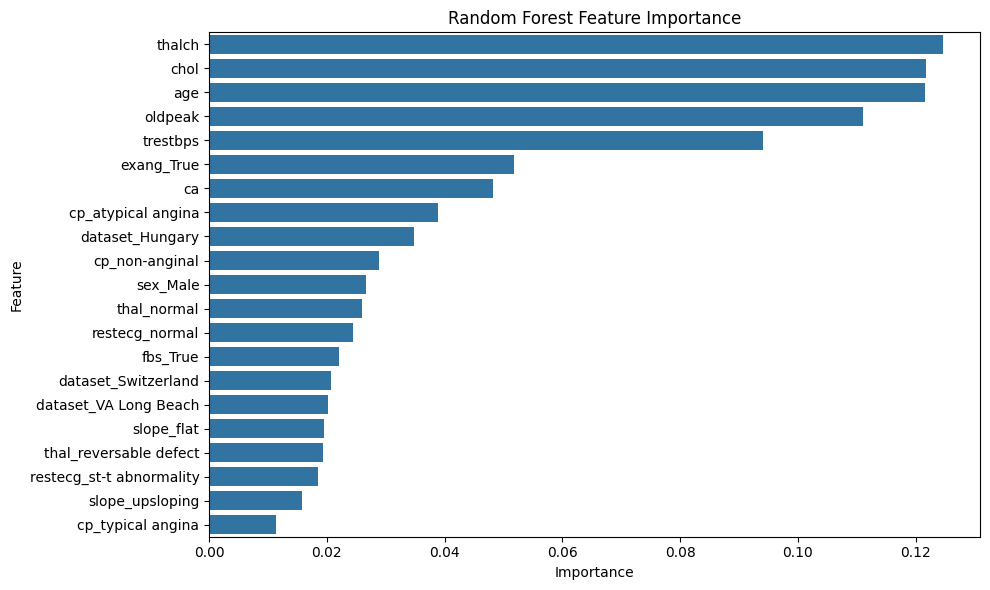

In [12]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance ranking
print(feature_importance_df)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

REF For best predictiors

In [14]:
top_features_rf = feature_importance_df['Feature'].head(10).tolist()
print(top_features_rf)

['thalch', 'chol', 'age', 'oldpeak', 'trestbps', 'exang_True', 'ca', 'cp_atypical angina', 'dataset_Hungary', 'cp_non-anginal']


In [19]:
estimator = LogisticRegression(max_iter=10000)
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_].tolist()
print("RFE selected features:", selected_features_rfe)

RFE selected features: ['oldpeak', 'ca', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'exang_True', 'thal_normal']


Chi Square 

In [20]:
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X.abs(), y)

chi2_features = X.columns[chi2_selector.get_support()].tolist()
print("Chi-Square selected features:", chi2_features)

Chi-Square selected features: ['age', 'chol', 'thalch', 'oldpeak', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'exang_True', 'thal_reversable defect']


Finalization

In [22]:
final_features = list(set(top_features_rf) | set(selected_features_rfe) | set(chi2_features))
print("Final selected features:", final_features)

# Create reduced dataset
df_reduced = df[final_features + ['num']]  # include target
print("Reduced dataset shape:", df_reduced.shape)
print(df_reduced.head())

# Save reduced dataset
df_reduced.to_csv(r"F:\Omar 3amora\Heart_Disease_Project\Data\heart_disease_reduced_features.csv", index=False)
print("Reduced dataset with selected key features saved successfully!")

Final selected features: ['exang_True', 'thal_normal', 'dataset_Hungary', 'trestbps', 'thal_reversable defect', 'oldpeak', 'thalch', 'cp_atypical angina', 'age', 'dataset_VA Long Beach', 'sex_Male', 'cp_non-anginal', 'ca', 'dataset_Switzerland', 'chol']
Reduced dataset shape: (920, 16)
   exang_True  thal_normal  dataset_Hungary  trestbps  thal_reversable defect  \
0       False        False            False     145.0                   False   
1        True         True            False     160.0                   False   
2        True        False            False     120.0                    True   
3       False         True            False     130.0                   False   
4       False         True            False     130.0                   False   

   oldpeak  thalch  cp_atypical angina  age  dataset_VA Long Beach  sex_Male  \
0      2.3   150.0               False   63                  False      True   
1      1.5   108.0               False   67                  False